In [ ]:
import wavespectra 
import xarray as xr
import numpy as np 
import pandas as pd
import requests
from wavespectra import read_ndbc_ascii

from spectral_data import freqDirection as fetch_direction_data

raw_directionalData = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/44007.swdir')

directions, freqs = fetch_direction_data(raw_directionalData)

spec = 'data_files/spec.txt'
swdir = 'data_files/swdir.txt'
swdir2 = 'data_files/swdir2.txt'
swr1 = 'data_files/swr1.txt'
swr2 = 'data_files/swr2.txt'

dirs = np.array(directions)






dset = read_ndbc_ascii([spec, swdir, swdir2, swr1, swr2], dirs)






ValueError: cannot reshape array of size 98072 into shape (2174,46,1)

: 

In [230]:
import matplotlib.pyplot as plt
from wavespectra import read_ww3
import pandas as pd
pd.options.display.max_seq_items = 10000
dset = read_ww3("ww3file.nc")

ds = dset.isel(site=0, time=[0])

ds.efth

np = ds.as_numpy()
print(str(np.efth))



# hs = dset.efth.spec.hs()



# hs.plot.line(x="time")
# plt.draw()


<xarray.DataArray 'efth' (time: 1, freq: 25, dir: 24)> Size: 2kB
array([[[5.59581663e-17, 1.06111318e-16, 9.69219673e-16, 1.37684083e-15,
         1.07817246e-15, 1.36615774e-15, 2.53999262e-15, 3.25248751e-15,
         2.68439373e-15, 1.24314611e-15, 1.41196951e-15, 4.99900846e-15,
         4.42179108e-15, 3.94589663e-15, 1.45532331e-15, 4.63382132e-16,
         6.93129655e-16, 2.25631948e-16, 9.14645367e-17, 1.06571336e-16,
         7.24913494e-17, 5.30522047e-17, 5.10764771e-17, 7.83873208e-17],
        [2.85698684e-13, 2.27892497e-11, 2.31087482e-10, 2.81733525e-10,
         1.77052080e-12, 4.57643007e-10, 2.67930278e-09, 8.65126804e-10,
         3.40401665e-11, 1.22064444e-14, 4.45900675e-15, 1.52257740e-15,
         6.23661836e-16, 1.09314981e-15, 7.39493538e-16, 1.85761962e-16,
         7.61872056e-17, 4.27161998e-16, 5.94982094e-16, 2.82020704e-14,
         3.60094712e-14, 4.59371412e-14, 6.47229733e-14, 1.57047362e-13],
        [4.92609165e-12, 1.54682200e-09, 1.08037055e-08, 

In [ ]:
import matplotlib.pyplot as plt
from wavespectra import read_ww3
# dset = read_ww3("ww3file.nc")

# ds = dset.isel(site=0, time=[0])

# ds.efth


<xarray.DataArray 'efth' (time: 1, freq: 25, dir: 24)> Size: 2kB
dask.array<getitem, shape=(1, 25, 24), dtype=float32, chunksize=(1, 25, 24), chunktype=numpy.ndarray>
Coordinates:
  * freq     (freq) float32 100B 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
    site     int32 4B 1
  * time     (time) datetime64[ns] 8B 2014-12-01
  * dir      (dir) float32 96B 270.0 255.0 240.0 225.0 ... 315.0 300.0 285.0
Attributes:
    standard_name:  sea_surface_wave_directional_variance_spectral_density
    units:          m2 s degree-1

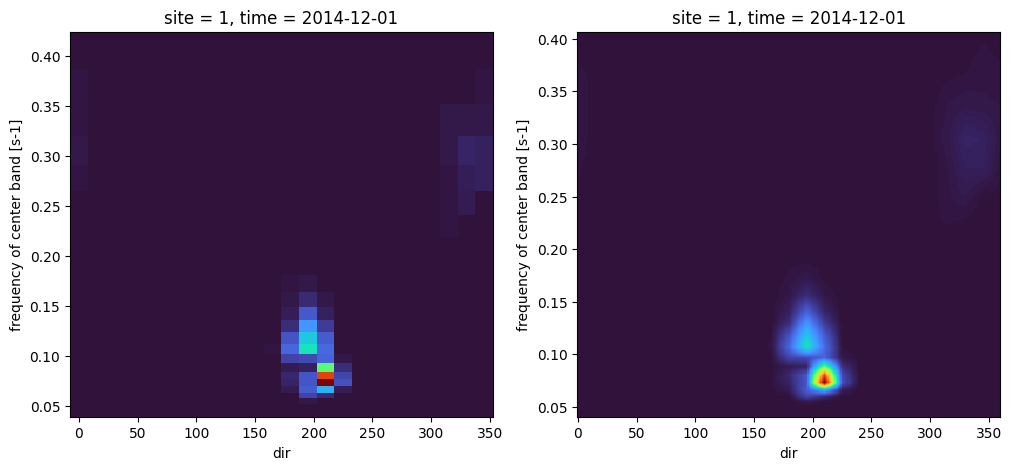

In [ ]:
# WW3 file example
from wavespectra import read_ww3
import matplotlib.pyplot as plt
import cmocean

# dset = read_ww3("ww3file.nc")

# ds = dset.efth.isel(site=0, time=0).sortby("dir")

# freq = np.arange(ds.freq.min(), ds.freq.max()+0.001, 0.001)

# dir = np.arange(0, 360, 1)

# ds_interp = ds.spec.interp(freq=freq, dir=dir)

# fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ds.plot(ax=axs[0], x="dir", y="freq", cmap="turbo", add_colorbar=False)

# ds_interp.plot(ax=axs[1], x="dir", y="freq", cmap="turbo", add_colorbar=False)

# plt.draw()
# ds.spec.plot(kind="contourf", cmap=cmocean.cm.thermal);

In [ ]:
# Syntheic model example
from wavespectra.construct import construct_partition

#freq = np.arange(0.030, 0.401, 0.001)

#dir = np.arange(0, 360, 1)

ds = construct_partition(
    freq_name="jonswap",
    dir_name="cartwright",
    freq_kwargs={"freq":  freq, "fp": 0.1, "gamma": 3.3, "hs": 1.5},
    dir_kwargs={"dir": dir, "dm": 60, "dspr": 30},
)

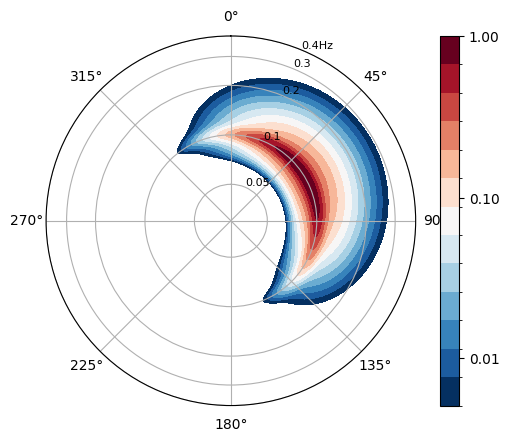

In [6]:
ds.spec.plot()


In [311]:
import numpy as np
import xarray as xr
import wavespectra
from wavespectra import read_ndbc_ascii
from wavespectra import read_ndbc 
import requests
import matplotlib.pyplot as plt
from spectral_data import get_spectral_data as fetch_spectral_data
from spectral_data import freqDirection as fetch_direction_data


portlandBuoyID = 44007

# NDBC Raw Spectral Data
raw_spec = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.data_spec')
raw_swdir = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.swdir')
raw_swdir2 = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.swdir2')
raw_swr1 = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.swr1')
raw_swr2 = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.swr2')

raw_directionalData = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.swdir')
raw_spectralData = requests.get(f'https://www.ndbc.noaa.gov/data/realtime2/{portlandBuoyID}.data_spec')

# Spectral dataq
seperation, densities, frequencies, periods = fetch_spectral_data(raw_spec)
directions, freqs = fetch_direction_data(raw_directionalData)

efth = np.array(densities)
freq = np.array(freqs)
periods = np.array(periods)

    







In [297]:
with open("data_files/spec.txt","w") as f:
    f.write(raw_spec.text)
with open("data_files/swdir.txt","w") as f:
    f.write(raw_swdir.text) 
with open("data_files/swdir2.txt","w") as f:
    f.write(raw_swdir2.text)
with open("data_files/swr1.txt","w") as f:
    f.write(raw_swr1.text)
with open("data_files/swr2.txt","w") as f:
    f.write(raw_swr2.text)
    


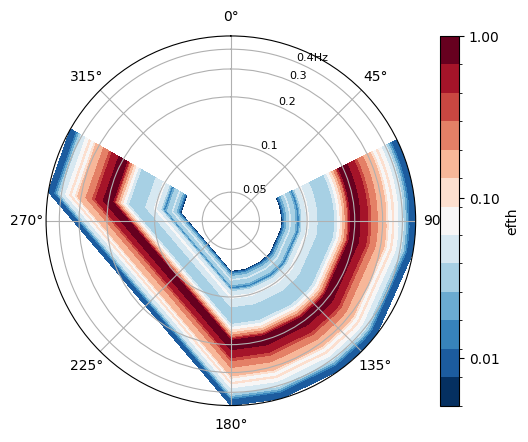

In [316]:

dir = np.array(directions)


densities_2d = np.tile(efth[:, np.newaxis], (1, len(dir)))

da = xr.DataArray(
    data = densities_2d,
    dims=("freq", "dir"),
    coords=dict(freq=freq.astype(float), dir=dir),
    name="efth"
)

dataset = da.to_dataset() 

ds = dataset.efth
ds.spec.plot()

